<a href="https://colab.research.google.com/github/rohan53532211/Traffic-Sign-Recognition-using-CNN-/blob/main/traffic_sign_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [2]:
data =[]
labels = []
classes = 43
current_path = "/content/drive/MyDrive/Traffic_sign_project/train"

for i in range (classes):
  path = os.path.join(current_path, str(i))
  images = os.listdir(path)
  for j in images:
    try:
      image= Image.open(os.path.join(path,j))
      image= image.resize((30,30))
      image= np.array(image)
      data.append(image)
      labels.append(i)
    except:
      print("Error loading image")

data = np.array(data)
labels = np.array(labels)

In [4]:
print(data.shape, labels.shape)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39219, 30, 30, 3) (39219,)
(31375, 30, 30, 3) (7844, 30, 30, 3) (31375,) (7844,)


In [7]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5), activation = 'relu', input_shape = X_train.shape[1:]))
model.add(Conv2D(filters = 32, kernel_size = (5,5), activation = 'relu'))
model.add(MaxPool2D(pool_size= (2,2)))
model.add(Dropout(rate = 0.25))
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(rate= 0.25))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(rate = 0.5))
model.add(Dense(43, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
epochs = 15
history = model.fit(X_train, y_train, batch_size = 64, epochs = epochs, validation_data = (X_test, y_test))

Epoch 1/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 113s 225ms/step - accuracy: 0.2669 - loss: 3.8810 - val_accuracy: 0.8766 - val_loss: 0.4658
Epoch 2/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 109s 221ms/step - accuracy: 0.7873 - loss: 0.7458 - val_accuracy: 0.9401 - val_loss: 0.2143
Epoch 3/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 114s 232ms/step - accuracy: 0.8719 - loss: 0.4544 - val_accuracy: 0.9767 - val_loss: 0.0904
Epoch 4/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 142s 231ms/step - accuracy: 0.9115 - loss: 0.3165 - val_accuracy: 0.9704 - val_loss: 0.1003
Epoch 5/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 142s 232ms/step - accuracy: 0.9260 - loss: 0.2515 - val_accuracy: 0.9873 - val_loss: 0.0475
Epoch 6/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 138s 224ms/step - accuracy: 0.9385 - loss: 0.2210 - val_accuracy: 0.9788 - val_loss: 0.0713
Epoch 7/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 144s 229ms/step - accuracy: 0.9479 - loss: 0.1898 - val_accuracy: 0.9912 - val_loss: 0.0349
Epoch 8/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 139s 223ms/step - accuracy: 0.9514 -

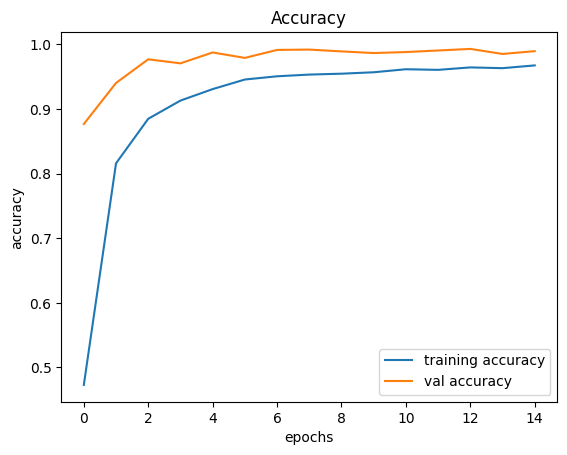

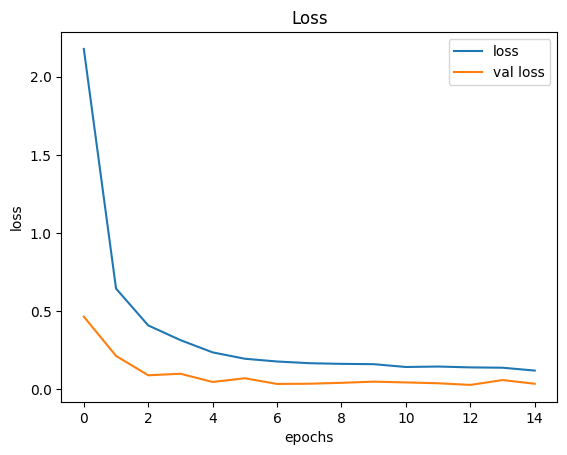

In [14]:
plt.figure(0)
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.plot(history.history['val_accuracy'], label ='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [35]:
from sklearn.metrics import accuracy_score

csv_path = '/content/drive/MyDrive/Traffic_sign_project/Test.csv'
df = pd.read_csv(csv_path)
df["Path"] = df["Path"].str.replace("Test/", "test/")
df.to_csv(csv_path, index=False)

test_folder = "/content/drive/MyDrive/Traffic_sign_project/test"

image_paths = df["Path"].values
labels = df["ClassId"].values.astype(int)

data = []

for rel_path in image_paths:
    try:
        full_path = os.path.join(test_folder, os.path.basename(rel_path))
        image = Image.open(full_path)
        image = image.resize((30, 30))
        data.append(np.array(image))
    except Exception as e:
        print(f"Error loading {rel_path}: {e}")

if len(data) == 0:
    raise ValueError("No test images loaded. Check your image paths.")

X_test = np.array(data)

pred_probs = model.predict(X_test)
pred = np.argmax(pred_probs, axis=1)

print("Test Accuracy:", accuracy_score(labels, pred))

395/395 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step
Test Accuracy: 0.960332541567696
